In [ ]:
%pip install -q softposit

In [2]:
import softposit as sp
import numpy as np

In [3]:
for v in [0.0, 1/16, 1/8, 1/4, 1/2, 1]:
    print(f'{v:0.6f}', end=' ')
    sp.posit32(v).toBinaryFormatted()

print("1 to 1000")
for v in np.arange(0.0,0):
    print(f'{v:0.6f}', end=' ')
    sp.posit32(v).toBinaryFormatted()

print("0.00001 to 0.0001")
for v in np.arange(0.00001, 0.0001, 0.00001):
    print(f'{v:0.6f}', end=' ')
    sp.posit32(v).toBinaryFormatted()

0.000000 00000000 00000000 00000000 00000000
0.062500 00100000 00000000 00000000 00000000
0.125000 00101000 00000000 00000000 00000000
0.250000 00110000 00000000 00000000 00000000
0.500000 00111000 00000000 00000000 00000000
1.000000 01000000 00000000 00000000 00000000
1 to 1000
0.000000 00000000 00000000 00000000 00000000
100.000000 01101010 01000000 00000000 00000000
200.000000 01101110 01000000 00000000 00000000
300.000000 01110000 01011000 00000000 00000000
400.000000 01110001 00100000 00000000 00000000
500.000000 01110001 11101000 00000000 00000000
600.000000 01110010 01011000 00000000 00000000
700.000000 01110010 10111100 00000000 00000000
800.000000 01110011 00100000 00000000 00000000
900.000000 01110011 10000100 00000000 00000000
0.00001 to 0.0001
0.000010 00000011 10100111 11000101 10101100
0.000020 00000100 01001111 10001011 01011001
0.000030 00000100 11110111 01010001 00000101
0.000040 00000101 01001111 10001011 01011001
0.000050 00000101 10100011 01101110 00101111
0.000060 

In [4]:
all_f16s = set()
def gen_f16s():
    for b0 in range(255):
        for b1 in range(255):
            try:
                f = np.frombuffer(bytes([b0, b1]), dtype=np.float16)[0]
                if not np.isnan(f):
                    all_f16s.add(f)
            except Exception as e:
                print(e)

gen_f16s()
print(f"Generated {len(all_f16s)} float16's.")

Generated 63241 float16's.


In [5]:
all_p16s = set()

# Hope they will once merge https://gitlab.com/cerlane/SoftPosit-Python/-/merge_requests/1 soon
class hp16(sp.posit16):
    def __hash__(self):
        return hash(self.v)


def gen_p16s():
    for i in range(2 ** 16):
        try:
            p = hp16(bits=i)
            if not p.isNaR():
                all_p16s.add(p)
        except Exception as e:
            print(e)

gen_p16s()
print(f"Generated {len(all_p16s)} posit16's.")

Generated 65535 posit16's.


In [19]:
print("Floats:", min(all_f16s), max(all_f16s), min([f for f in all_f16s if f > 0.0]), max([f for f in all_f16s if not np.isinf(f)]))
print("Posits:", min(all_p16s), max(all_p16s), min([f for f in all_p16s if f > 0.0]))
max(all_p16s).toBinaryFormatted()
print(sorted(all_p16s)[-2])
sorted(all_p16s)[-2].toBinaryFormatted()
sorted(all_p16s)[-4].toBinaryFormatted()
sorted(all_p16s)[-5].toBinaryFormatted()
sorted(all_p16s)[-6].toBinaryFormatted()

Floats: -inf inf 6e-08 65470.0
Posits: -268435456.0 268435456.0 3.725290298461914e-09
01111111 11111111
67108864.0
01111111 11111110
01111111 11111100
01111111 11111011
01111111 11111010


Floats 1..16


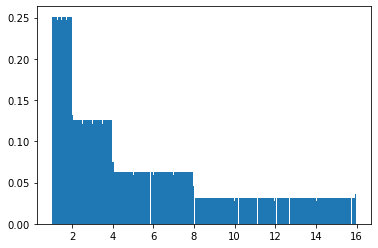

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
num_bins = 256

print("Floats 1..16")
plt.hist([f for f in all_f16s if 1 <= f < 16], num_bins,
         density=True,
         histtype='bar'
)

plt.show()

In [35]:
# С Posit так не получится, слишком уж они недоделанные
# Вот тут нужна уже большая работа, можно присоединиться: https://gitlab.com/cerlane/SoftPosit-Python/-/issues/5

import numbers

for t in [np.float32, sp.posit32]:
    print(t, issubclass(t, numbers.Real))

<class 'numpy.float32'> True
<class 'softposit.posit32'> False


Foats and Posits 1..16


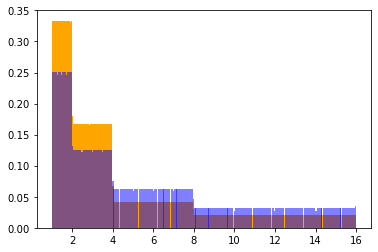

In [18]:
print("Foats and Posits 1..16")

# Ок, возьмём float64 — у них точности с запасом. Временно =)
all_p16f64s = [np.float64(p) for p in all_p16s]

plt.clf()

plt.hist([f for f in all_p16f64s if 1 <= f < 16], num_bins,
         density=True,
         histtype='bar',
         color='orange'
)

plt.hist([f for f in all_f16s if 1 <= f < 16], num_bins,
         density=True,
         histtype='bar',
         alpha=0.5,
         color='blue'
)

plt.show()